# Common Accent 2

https://huggingface.co/Jzuluaga/accent-id-commonaccent_ecapa

In [1]:
import torchaudio
from speechbrain.pretrained import EncoderClassifier

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
C:\Users\peter\.conda\envs\audio4\lib\site-packages\speechbrain\utils\torch_audio_backend.py:22: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
torchvision is not available - cannot save figures
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
C:\Users\peter\.conda\envs\audio4\lib\site-packages\speechbrain\utils\torch_audio_backend.py:22: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


### Access to the model requires that the Anaconda be run as Administrator

In [2]:
classifier = EncoderClassifier.from_hparams(source="Jzuluaga/accent-id-commonaccent_ecapa", savedir="pretrained_models/accent-id-commonaccent_ecapa")

In [3]:
# Irish Example
#out_prob, score, index, text_lab = classifier.classify_file('Jzuluaga/accent-id-commonaccent_ecapa/data/ireland_1.wav')
out_prob, score, index, text_lab = classifier.classify_file('C:\\Users\\peter\\VoxPop\\commonaccent\\data_ireland_1.wav')
print(text_lab)

['ireland']


C:\Users\peter\.conda\envs\audio4\lib\site-packages\speechbrain\dataio\encoder.py:722: UserWarning: CategoricalEncoder.expect_len was never called: assuming category count of 16 to be correct! Sanity check your encoder using `.expect_len`. Ensure that downstream code also uses the correct size. If you are sure this does not apply to you, use `.ignore_len`.
  warnings.warn(


In [4]:
# Malaysia Example
out_prob, score, index, text_lab = classifier.classify_file('C:\\Users\\peter\\VoxPop\\commonaccent\\data_malaysia_1.wav')
print(text_lab)


['malaysia']


In [6]:
import os

In [7]:
DIR_PATH=os.getcwd()
DIR_PATH=DIR_PATH+"\sample_output_directory\*.wav"
#DIR_PATH=r"C:\Users\peter\VoxPop\ANT\*.wav"
print(DIR_PATH)

C:\Users\peter\VoxPop\sample_output_directory\*.wav


In [14]:
import glob

In [18]:
filenames=[]

In [19]:
res = glob.glob(DIR_PATH)
for filename in res:
    filenames.append(filename)
print(len(filenames))

21594


In [20]:
import time

In [107]:
# Start time
start_time = time.time()

In [108]:
files=[]
out_probs=[]
scores=[]
text_labs=[]
trues=[]

In [109]:
for number, file in enumerate(filenames):
    #print(number)
    #print(file)
    out_prob, score, index, text_lab = classifier.classify_file(file)
    files.append(file)
    out_probs.append(out_prob.flatten().numpy())
    text_labs.append(text_lab[0])
    scores.append(score[0])
    true=(text_lab[0]=='ireland')
    trues.append(true)
    #print(out_prob, score, index)
    #print("{:.2f}".format(float(score[0]) * 100))
    #print(text_lab[0]+"\n")

In [115]:
# End time
end_time = time.time()

# Execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds {execution_time/60:.2f} minutes" )

Execution time: 3338.72 seconds 55.65 minutes


In [25]:
import pandas as pd

In [116]:
print(len(files))
print(len(text_labs))
print(len(scores))
print(len(trues))
print(len(out_probs))

21594
21594
21594
21594
21594


In [117]:
# Create a dictionary with column names as keys and lists as values
data = {
    'file': files,
    'out_prob': out_probs,
    'text_lab': text_labs,
    'score': scores,
    'true': trues
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

In [118]:
df

,file,out_prob,text_lab,score,true
0,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.46775746, 0.51209784, 0.35003126, 0.2508372...",us,tensor(0.5121),False
1,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.33711463, 0.6235305, 0.55231106, 0.38076192...",us,tensor(0.6235),False
2,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.34367928, 0.46769005, 0.19954014, 0.3333324...",us,tensor(0.4677),False
3,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.5354333, 0.18778895, 0.12865376, 0.17647633...",england,tensor(0.5354),False
4,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.5854126, 0.30902618, 0.0724244, 0.14701594,...",england,tensor(0.5854),False
...,...,...,...,...,...
21589,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.19778767, 0.38407403, -0.054174658, 0.21990...",scotland,tensor(0.4497),False
21590,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.5277188, 0.15278128, -0.17591949, 0.1386958...",england,tensor(0.5277),False
21591,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.51234096, 0.3661647, 0.06659398, 0.18252993...",england,tensor(0.5123),False
21592,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.39278162, 0.37522447, 0.11022212, 0.0833859...",england,tensor(0.3928),False


In [119]:
df['true'][df['true']==True].sum()

651

In [120]:
print("{:.2%}".format(df['true'][df['true']==True].sum() / len (filenames)))

3.01%


In [121]:
df[df['text_lab']=='ireland']

,file,out_prob,text_lab,score,true
16,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.27312946, 0.3324712, 0.16831839, 0.28433096...",ireland,tensor(0.4752),True
35,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.27026194, 0.2486932, 0.2305888, 0.042003576...",ireland,tensor(0.4827),True
62,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.21659653, 0.21417135, 0.2528292, 0.03536192...",ireland,tensor(0.2897),True
212,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.19705823, 0.42349064, 0.23447715, 0.0748811...",ireland,tensor(0.5702),True
275,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.21074745, 0.3354432, 0.05505607, 0.15546317...",ireland,tensor(0.5118),True
...,...,...,...,...,...
21408,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.25692257, -0.027206495, 0.08978666, 0.13821...",ireland,tensor(0.4102),True
21411,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.46664494, 0.40144613, 0.086355194, 0.128205...",ireland,tensor(0.4674),True
21514,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.27615035, 0.5190058, 0.32567048, 0.14064418...",ireland,tensor(0.5199),True
21549,C:\Users\peter\VoxPop\sample_output_directory\...,"[0.3495509, 0.26506916, 0.026432361, 0.1710534...",ireland,tensor(0.3536),True


In [122]:
df.to_csv("dub_classification_results_ecapa.csv")

In [123]:
x=out_prob.flatten().numpy()
x

array([ 0.1596539 ,  0.11591194,  0.08927685,  0.4878154 ,  0.03413256,
        0.14822993,  0.07451199,  0.14767906,  0.02483812,  0.3216225 ,
        0.07658767, -0.02186839, -0.00140277,  0.07046847, -0.09430879,
        0.11191359], dtype=float32)

In [124]:
labels = np.arange(len(x))
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import torch

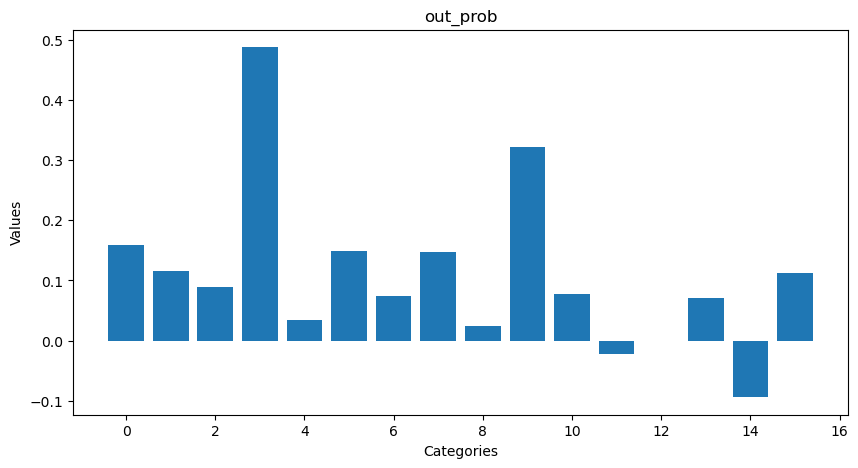

In [126]:
plt.figure(figsize=(10, 5))
plt.bar(labels,x)

# Add title and labels to the chart
plt.title('out_prob')
plt.xlabel('Categories')
plt.ylabel('Values')

# Display the chart
plt.show()


In [42]:
plt.bar?

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 